In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [17]:
# load the xlsx file
df = pd.read_excel("originalData\Iron_and_steel.xlsx", sheet_name="Iron_and_steel")
# save the data to a csv file
df.to_csv("originalData\Iron_and_steel.csv", index=False)

# the column names are "Export_country", "Import_country", "Month", "Year", "Nominal Value (SUM)", "Tons (SUM)"

# check whether there are any missing values
missing = df.isnull().sum()
print(missing)

# remove the rows with "Tons (SUM)" equal to 0
df = df[df["Tons (SUM)"] != 0]

# save the data to a csv file
df.to_csv("processedData\withoutZero.csv", index=False)

# calculate the Price
df["Price"] = df["Nominal Value (SUM)"] / df["Tons (SUM)"]

# save the data to a csv file
df.to_csv("processedData\withoutZero_withPrice.csv", index=False)

Export_country         0
Import_country         0
Month                  0
Year                   0
Nominal Value (SUM)    0
Tons (SUM)             0
dtype: int64


## anually

In [18]:
# load the data from the csv file
df = pd.read_csv('processedData\withoutZero.csv')

# group the data by "Export_country", "Import_country", "Year" and calculate the total export value and the total export volume
df = df.groupby(["Export_country", "Import_country", "Year"]).agg({"Nominal Value (SUM)": "sum", "Tons (SUM)": "sum"}).reset_index()

# save the data to a csv file
df.to_csv("processedData/anually.csv", index=False)


## decadely

In [19]:
# load the data from the csv file
df = pd.read_csv('processedData/anually.csv')

# group the data by "Export_country", "Import_country" and calculate the total export value and the total export volume
df = df.groupby(["Export_country", "Import_country"]).agg({"Nominal Value (SUM)": "sum", "Tons (SUM)": "sum"}).reset_index()

# save the data to a csv file
df.to_csv("processedData/decadely.csv", index=False)

### exporter

In [20]:
# load the data from the csv file
df = pd.read_csv('processedData/decadely.csv')

# group the data by "Export_country" and calculate the total export value and the total export volume
df = df.groupby(["Export_country"]).agg({"Nominal Value (SUM)": "sum", "Tons (SUM)": "sum"}).reset_index()

# calculate the Price
df["Price"] = df["Nominal Value (SUM)"] / df["Tons (SUM)"]

# save the data to a csv file
df.to_csv("processedData/decadely_exporters_withPrice.csv", index=False)

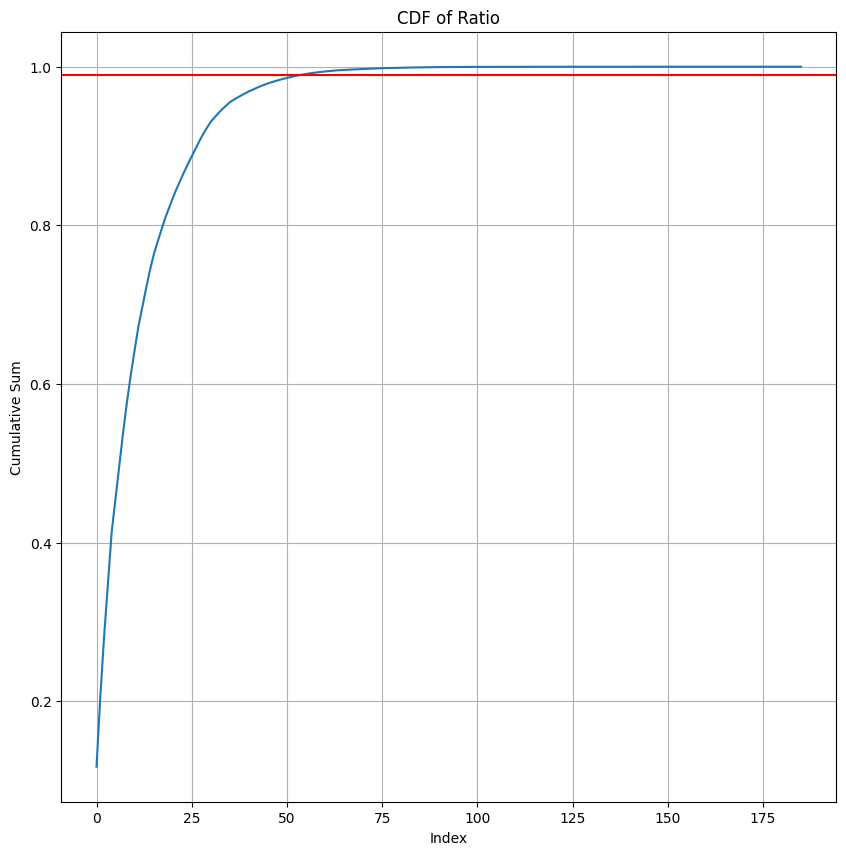

['China (mainland)', 'Russia', 'Japan', 'South Korea', 'Germany', 'Belgium', 'Brazil', 'Ukraine', 'India', 'France', 'United States', 'Indonesia', 'Netherlands', 'Italy', 'Taiwan', 'Sweden', 'Austria', 'United Kingdom', 'Canada', 'Spain', 'Slovakia', 'Malaysia', 'South Africa', 'Vietnam', 'Mexico', 'Iran', 'Turkey', 'Finland', 'Norway', 'Poland', 'Oman', 'United Arab Emirates', 'Kazakhstan', 'Czech Republic', 'Romania', 'Slovenia', 'Hungary', 'Egypt', 'Thailand', 'Australia', 'Georgia', 'Serbia', 'Luxembourg', 'Venezuela', 'Areas, nes., Spec Cat, Islands, Other', 'Qatar', 'Portugal', 'Switzerland', 'Iceland', 'Singapore', 'Bhutan', 'Denmark', 'Belarus', 'Saudi Arabia', 'Libya', 'Greece']


In [21]:
# calculate the ratio of the "Nominal Value (SUM)" column to the sum of the "Nominal Value (SUM)" column of all the countries
df["Ratio"] = df["Nominal Value (SUM)"] / df["Nominal Value (SUM)"].sum()

# arrange the data in descending order of the "Ratio" column
df = df.sort_values("Ratio", ascending=False)

# plot the cdf of the "Ratio" column
plt.figure(figsize=(10, 10))
plt.plot(np.arange(len(df)), np.cumsum(df["Ratio"]))
# add the grid to the plot
plt.grid()
# add the y=0.99 line to the plot
plt.axhline(y=0.99, color="r", linestyle="-")
plt.xlabel("Index")
plt.ylabel("Cumulative Sum")
plt.title("CDF of Ratio")
plt.show()

# record the first x countries that make up 99% of the total "Nominal Value (SUM)" column
x = 0
total = 0
for index, row in df.iterrows():
    total += row["Ratio"]
    x += 1
    if total >= 0.99:
        break

# store the countries that make up 99% of the total "Nominal Value (SUM)" column
countries = df["Export_country"].values[:x].tolist()

# save the countries to a txt file
with open("processedData/decadely_exporters_rank.txt", "w") as f:
    for country in countries:
        f.write(country + "\n")

print(countries)

#### rank with Nominal Value

In [22]:
# load the data from the csv file
df = pd.read_csv('processedData/decadely_exporters_withPrice.csv')

# sort the data by "Nominal Value (SUM)" in descending order
df = df.sort_values(by="Nominal Value (SUM)", ascending=False)

# save the data to a csv file
df.to_csv("processedData/decadely_exporters_withPrice_rankedWithValue.csv", index=False)

#### rank with Ton

In [23]:
# load the data from the csv file
df = pd.read_csv('processedData/decadely_exporters_withPrice.csv')

# sort the data by "Tons (SUM)" in descending order
df = df.sort_values(by="Tons (SUM)", ascending=False)

# save the data to a csv file
df.to_csv("processedData/decadely_exporters_withPrice_rankedWithVolume.csv", index=False)

#### rank with price

In [24]:
# load the data from the csv file
df = pd.read_csv('processedData/decadely_exporters_withPrice.csv')

# sort the data by "Price" in descending order
df = df.sort_values(by="Price", ascending=False)

# save the data to a csv file
df.to_csv("processedData/decadely_exporters_withPrice_rankedWithPrice.csv", index=False)

### importer

In [25]:
# load the data from the csv file
df = pd.read_csv('processedData/decadely.csv')

# group the data by "Import_country" and calculate the total export value and the total export volume
df = df.groupby(["Import_country"]).agg({"Nominal Value (SUM)": "sum", "Tons (SUM)": "sum"}).reset_index()

# calculate the Price
df["Price"] = df["Nominal Value (SUM)"] / df["Tons (SUM)"]

# save the data to a csv file
df.to_csv("processedData/decadely_importers_withPrice.csv", index=False)

### the impoter and the exporter

In [26]:
# calculate the difference between the price per ton of a country when it is an exporter and when it is an importer
df_exporters = pd.read_csv('processedData/decadely_exporters_withPrice.csv')
df_importers = pd.read_csv('processedData/decadely_importers_withPrice.csv')

# merge the two dataframes
df = pd.merge(df_exporters, df_importers, left_on="Export_country", right_on="Import_country", suffixes=('_exporter', '_importer'))

# rename the column "Export_country" to "Country" and drop the column "Import_country"
df = df.rename(columns={"Export_country": "Country"}).drop(columns=["Import_country"])

# save the data to a csv file
df.to_csv("processedData/decadely_trader.csv", index=False)

#### price difference

In [27]:
# load the data from the csv file
df = pd.read_csv('processedData/decadely_trader.csv')

# calculate the difference between the price per ton of a country when it is an exporter and when it is an importer
df["Difference"] = df["Price_exporter"] - df["Price_importer"]

# calculate the ratio of the difference to the price per ton of a country when it is an importer
df["Ratio"] = df["Difference"] / df["Price_importer"]

# save the data to a csv file
df.to_csv("processedData/decadely_trader_differenceInPrice.csv", index=False)

##### rank in the ratio

In [28]:
# load the data from the csv file
df = pd.read_csv('processedData/decadely_trader_differenceInPrice.csv')

# rank the countries by the "Ratio" column
df = df.sort_values(by="Ratio", ascending=False)

# save the data to a csv file
df.to_csv("processedData/decadely_trader_differenceInPrice_rankedWithRatio.csv", index=False)

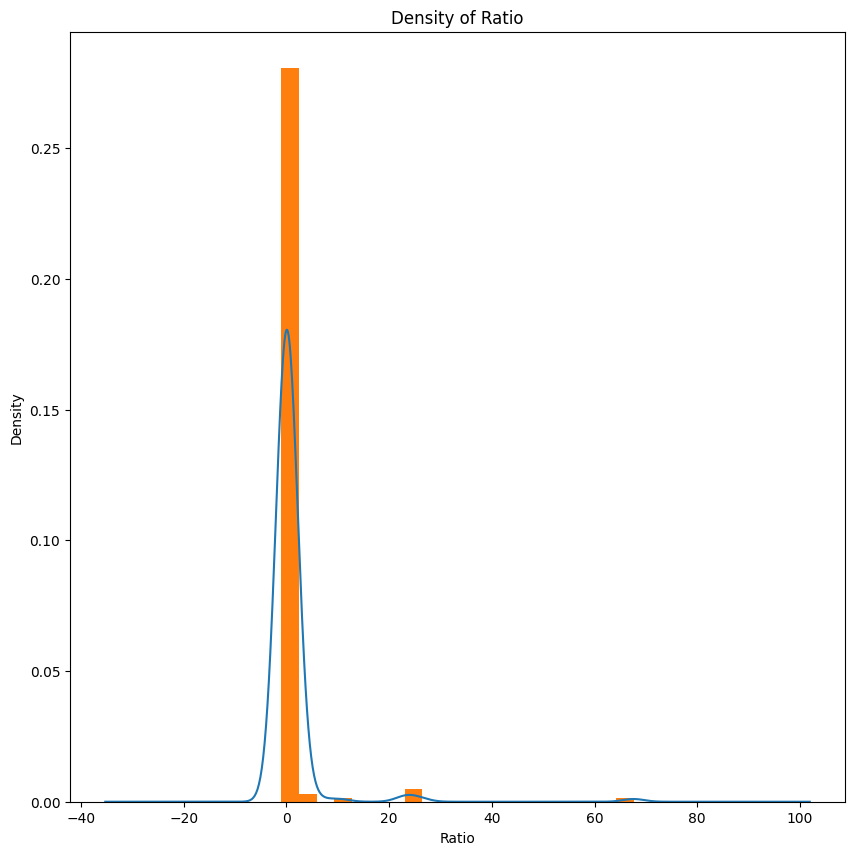

count    1.860000e+02
mean     7.640244e-17
std      1.002699e+00
min     -3.282915e+00
25%     -5.321588e-01
50%      3.740188e-02
75%      6.479544e-01
max      2.932066e+00
Name: Ratio, dtype: float64


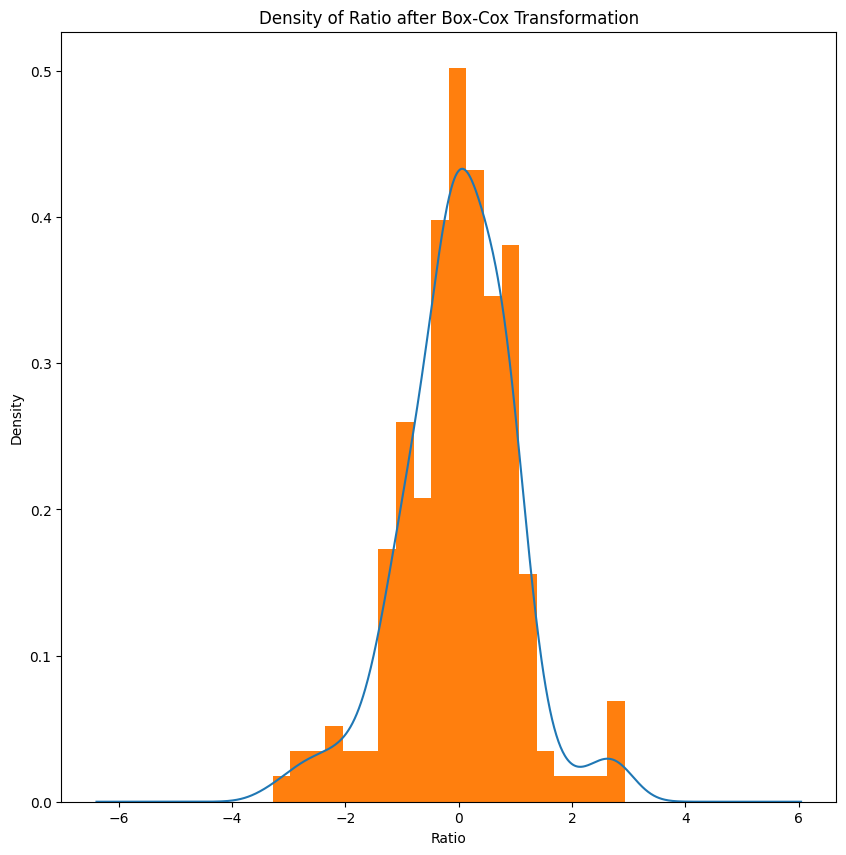

['Benin' 'New Caledonia' 'Sudan' 'Syria' 'Dominican Republic'
 'Afghanistan' 'Rest of America, nes.' 'Anguilla' 'Venezuela'
 'Other Africa, nes.' 'Mongolia' 'Montenegro' 'Rwanda' 'Gibraltar']


In [29]:
# plot the density of the "Ratio" column
plt.figure(figsize=(10, 10))
df["Ratio"].plot.kde()
plt.hist(df["Ratio"], bins=20, density=True)
plt.xlabel("Ratio")
plt.ylabel("Density")
plt.title("Density of Ratio")
plt.show()

# # do box-cox transformation on the "Ratio" column
# df["Ratio"] = np.log1p(df["Ratio"])

# do Yeo-Johnson transformation on the "Ratio" column
pt = PowerTransformer(method="yeo-johnson")
df["Ratio"] = pt.fit_transform(df[["Ratio"]])
print(df["Ratio"].describe())

# plot the density of the "Ratio" column after the box-cox transformation
plt.figure(figsize=(10, 10))
df["Ratio"].plot.kde()
plt.hist(df["Ratio"], bins=20, density=True)
plt.xlabel("Ratio")
plt.ylabel("Density")
plt.title("Density of Ratio after Box-Cox Transformation")
plt.show()

# get those countries away from the mean by 2 standard deviations after the box-cox transformation
df = df[np.abs(df["Ratio"] - df["Ratio"].mean()) > 2 * df["Ratio"].std()]
print(df["Country"].values)


#### Tons difference

In [32]:
# load the data from the csv file
df = pd.read_csv('processedData/decadely_trader.csv')

# calculate the difference between volume of a country when it is an exporter and when it is an importer
df["Difference"] = df["Tons (SUM)_exporter"] - df["Tons (SUM)_importer"]

# calculate the ratio of the difference to the volume of a country when it is an importer
df["Ratio"] = df["Difference"] / df["Tons (SUM)_importer"]

# save the data to a csv file
df.to_csv("processedData/decadely_trader_differenceInVolume.csv", index=False)


##### rank in the ratio

In [37]:
# load the data from the csv file
df = pd.read_csv('processedData/decadely_trader_differenceInVolume.csv')

# rank the countries by the "Ratio" column
df = df.sort_values(by="Ratio", ascending=False)

# save the data to a csv file
df.to_csv("processedData/decadely_trader_differenceInVolume_rankedWithRatio.csv", index=False)

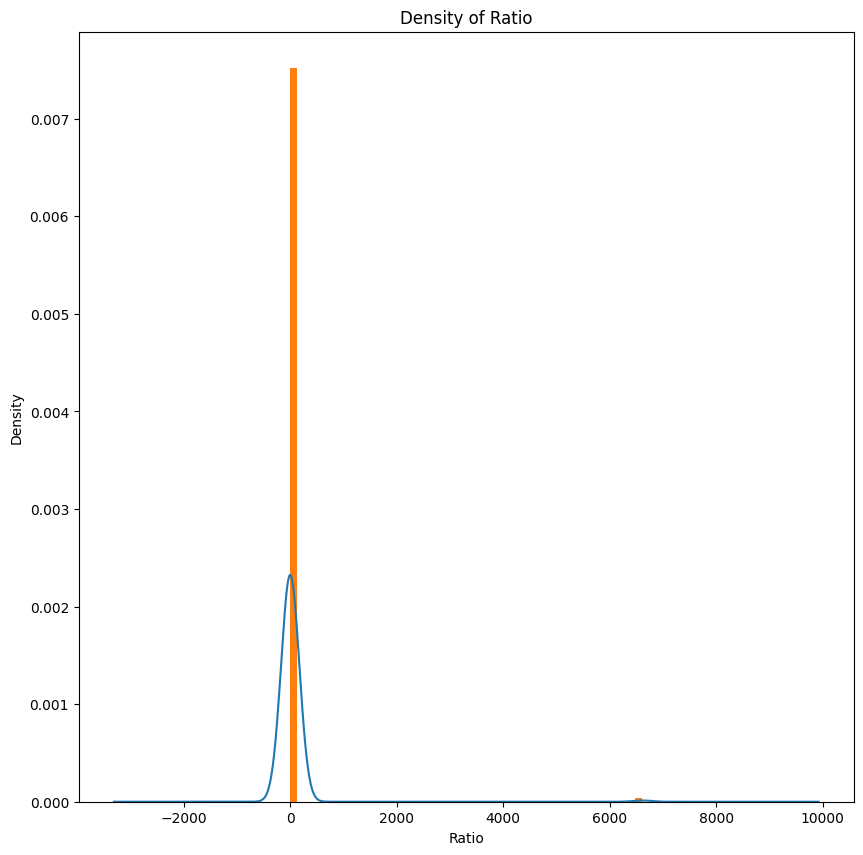

count    1.860000e+02
mean     7.640244e-17
std      1.002699e+00
min     -8.816010e-01
25%     -8.524418e-01
50%     -5.080194e-01
75%      8.175091e-01
max      2.254926e+00
Name: Ratio, dtype: float64


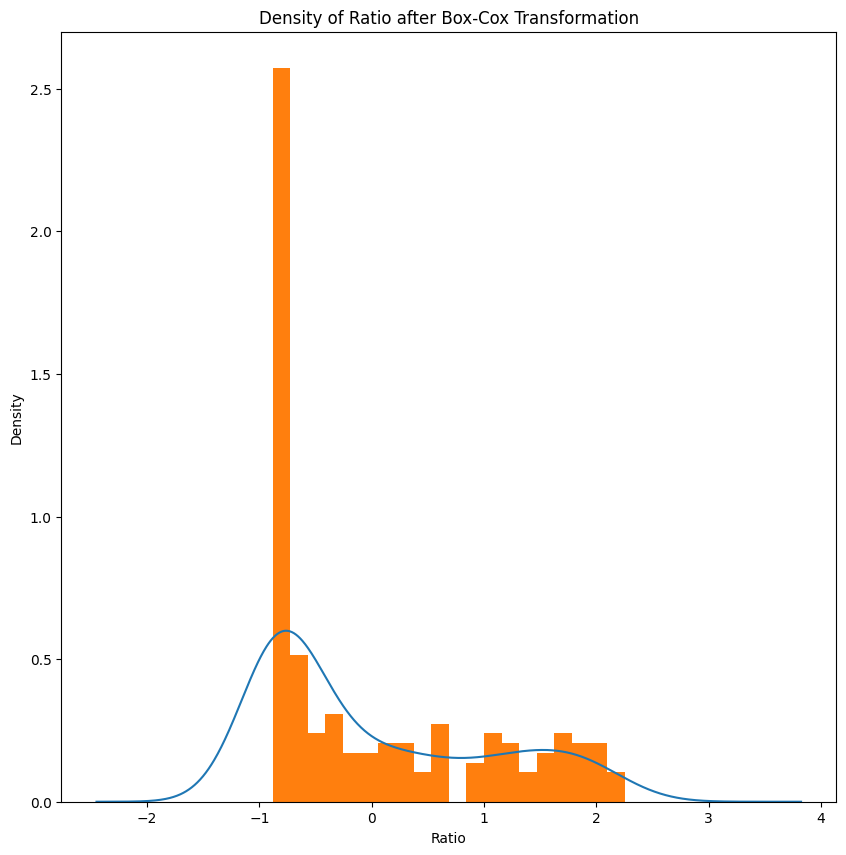

['Rest of America, nes.' 'Ukraine' 'Russia' 'Iceland' 'Venezuela'
 'Gibraltar' 'Brazil']


In [38]:
# plot the density of the "Ratio" column
plt.figure(figsize=(10, 10))
df["Ratio"].plot.kde()
plt.hist(df["Ratio"], bins=50, density=True)
plt.xlabel("Ratio")
plt.ylabel("Density")
plt.title("Density of Ratio")
plt.show()

# # do box-cox transformation on the "Ratio" column
# df["Ratio"] = np.log1p(df["Ratio"])

# do Yeo-Johnson transformation on the "Ratio" column
pt = PowerTransformer(method="yeo-johnson")
df["Ratio"] = pt.fit_transform(df[["Ratio"]])
print(df["Ratio"].describe())

# plot the density of the "Ratio" column after the box-cox transformation
plt.figure(figsize=(10, 10))
df["Ratio"].plot.kde()
plt.hist(df["Ratio"], bins=20, density=True)
plt.xlabel("Ratio")
plt.ylabel("Density")
plt.title("Density of Ratio after Box-Cox Transformation")
plt.show()

# get those countries away from the mean by 2 standard deviations after the box-cox transformation
df = df[np.abs(df["Ratio"] - df["Ratio"].mean()) > 2 * df["Ratio"].std()]
print(df["Country"].values)